In [1]:
#Major Project (Done by ML041B5)

#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns #visualisation
%matplotlib inline
import pandas as pd

#loading DataFrame
data=pd.read_excel("Data_Train.xlsx")
#Removing Units
data['Engine'] = data['Engine'].str[:-3]
data['Power'] = data['Power'].str[:-4]
data['Mileage'] = data['Mileage'].str[:-5]
#Adding Columns
data['Brand'] = data['Name'].str.split(' ').str[0]
data['Model'] = data['Name'].str.split(' ').str[1]
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi,A4


In [13]:
data.duplicated().sum()

0

In [2]:
# Rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print('number of duplicate rows:', duplicate_rows_data.shape) # No Duplicate Rows are found

# Dropping the missing values.
data = data.dropna() 
data.shape

number of duplicate rows: (0, 14)


(5975, 14)

In [3]:
# change the data type of an existing Series
data['Engine'] = data.Engine.astype(int) 
data['Mileage'] = data.Mileage.astype(float) 
#data[data['Power'].isnull()].index.tolist()
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')
data = data.dropna() 
data['Power'] = data['Power'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 14 columns):
Name                 5872 non-null object
Location             5872 non-null object
Year                 5872 non-null int64
Kilometers_Driven    5872 non-null int64
Fuel_Type            5872 non-null object
Transmission         5872 non-null object
Owner_Type           5872 non-null object
Mileage              5872 non-null float64
Engine               5872 non-null int32
Power                5872 non-null float64
Seats                5872 non-null float64
Price                5872 non-null float64
Brand                5872 non-null object
Model                5872 non-null object
dtypes: float64(4), int32(1), int64(2), object(7)
memory usage: 665.2+ KB


<h3>2. Outliers</h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x25e282262c8>,
 'caps': [<matplotlib.lines.Line2D at 0x25e28226188>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e25bc7208>],
 'medians': [<matplotlib.lines.Line2D at 0x25e28225308>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e28224548>],
 'means': []}

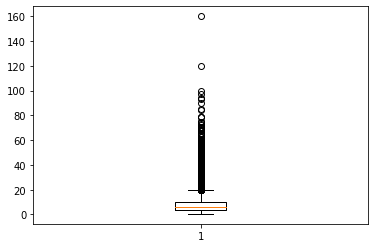

In [4]:
#plt.subplot(1, 3, 1)
plt.boxplot(data['Price']) 

In [5]:
#Detecting Outliers
#Q1 = data.quantile(0.25)
#Q3 = data.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [6]:
#Removing Outliers: This part can be commented (Rough)


# Get names of indexes for which column Age has value 30
indexNames = data[data['Price'] > 75 ].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860 entries, 0 to 6018
Data columns (total 14 columns):
Name                 5860 non-null object
Location             5860 non-null object
Year                 5860 non-null int64
Kilometers_Driven    5860 non-null int64
Fuel_Type            5860 non-null object
Transmission         5860 non-null object
Owner_Type           5860 non-null object
Mileage              5860 non-null float64
Engine               5860 non-null int32
Power                5860 non-null float64
Seats                5860 non-null float64
Price                5860 non-null float64
Brand                5860 non-null object
Model                5860 non-null object
dtypes: float64(4), int32(1), int64(2), object(7)
memory usage: 663.8+ KB


We can see 12 rows have been removed as they might make the results inaccurate.

<h3>Adding new column</h3>

In [7]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5860.000000,5.860000e+03,5860.000000,5860.000000,5860.000000,5860.000000,5860.000000
mean,2013.471502,5.839531e+04,18.288758,1621.811092,112.813155,5.286177,9.425718
std,3.163094,9.224067e+04,4.360973,594.310707,52.771879,0.800781,10.500721
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.355350e+04,15.290000,1198.000000,75.000000,5.000000,3.507500
50%,2014.000000,5.282850e+04,18.250000,1495.000000,94.840000,5.000000,5.705000
75%,2016.000000,7.243125e+04,21.100000,1984.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,552.000000,10.000000,75.000000


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.168827,0.288324,-0.073456,0.008627,0.009184,0.306243
Kilometers_Driven,-0.168827,1.000000,-0.061883,0.097349,0.038149,0.081978,-0.001790
Mileage,0.288324,-0.061883,1.000000,-0.637858,-0.539942,-0.338365,-0.345461
Engine,-0.073456,0.097349,-0.637858,1.000000,0.863424,0.424042,0.658982
Power,0.008627,0.038149,-0.539942,0.863424,1.000000,0.123671,0.772872
Seats,0.009184,0.081978,-0.338365,0.424042,0.123671,1.000000,0.086257
Price,0.306243,-0.001790,-0.345461,0.658982,0.772872,0.086257,1.000000


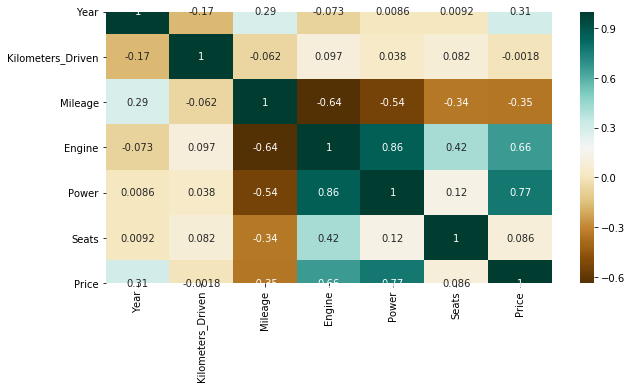

In [8]:
# Finding the relations between the variables.
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text xticklabel objects>)

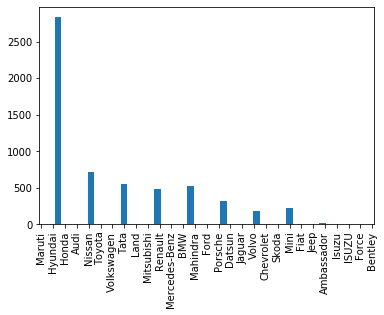

In [9]:
#histogram 
#plt.figure(figsize=(10,6))
plt.hist(data['Brand'],histtype='bar',rwidth=0.2)
plt.xticks(rotation=90)


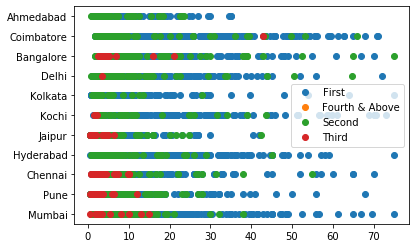

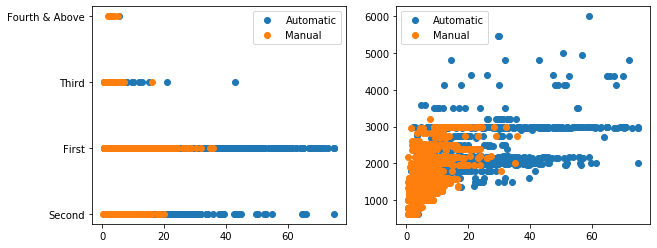

In [10]:
#data_last_50=data.tail(50)

groups = data.groupby('Owner_Type')
for name, group in groups:
    plt.plot(group["Price"], group["Location"], marker="o", linestyle="", label=name)
plt.legend()

groups = data.groupby('Transmission')
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
for name, group in groups:
    plt.plot(group["Price"], group["Owner_Type"], marker="o", linestyle="", label=name)
plt.legend()

plt.subplot(1, 2, 2)
for name, group in groups:
    plt.plot(group["Price"], group["Engine"], marker="o", linestyle="", label=name)
plt.legend()


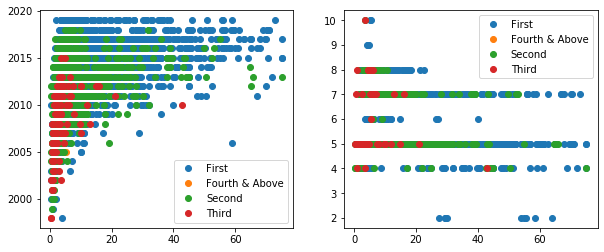

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
groups = data.groupby('Owner_Type')
for name, group in groups:
    plt.plot(group["Price"], group["Year"], marker="o", linestyle="", label=name)
plt.legend()

plt.subplot(1, 2, 2)
for name, group in groups:
    plt.plot(group["Price"], group["Seats"], marker="o", linestyle="", label=name)
plt.legend()


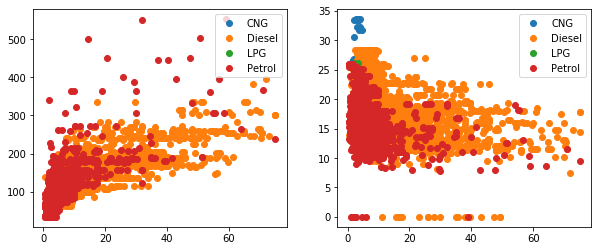

In [12]:
#data.groupby('prep_course').mean()
#data_top_50.groupby('prep_course').size()
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
groups = data.groupby('Fuel_Type')
for name, group in groups:
    plt.plot(group["Price"], group["Power"], marker="o", linestyle="", label=name)
plt.legend()

plt.subplot(1, 2, 2)
for name, group in groups:
    plt.plot(group["Price"], group["Mileage"], marker="o", linestyle="", label=name)
plt.legend()
